<a href="https://colab.research.google.com/github/PriyanshuPrasad1718/MesoNet-based-Deepfake-Identification-System/blob/main/Deepfake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MesoNet**: a Compact Facial Video Forgery Detection Network

# DeepFake image detection model trained on dataset:
https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

100% 1.68G/1.68G [01:24<00:00, 22.9MB/s]
100% 1.68G/1.68G [01:24<00:00, 21.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/deepfake-and-real-images.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Input
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/Validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(8,kernel_size=(3,3),padding= 'same', activation='relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(8,kernel_size=(5,5),padding= 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(16,kernel_size=(5,5),padding= 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(16,kernel_size=(5,5),padding= 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16, activation= 'leaky_relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 8)       224       
                                                                 
 batch_normalization_8 (Bat  (None, 256, 256, 8)       32        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 128, 128, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 8)       1608      
                                                                 
 batch_normalization_9 (Bat  (None, 128, 128, 8)       32        
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
4376/4376 [==============================] - 206s 46ms/step - loss: 0.1327 - accuracy: 0.8212 - val_loss: 0.0949 - val_accuracy: 0.8684
Epoch 2/10
4376/4376 [==============================] - 195s 44ms/step - loss: 0.0570 - accuracy: 0.9233 - val_loss: 0.0899 - val_accuracy: 0.8753
Epoch 3/10
4376/4376 [==============================] - 201s 46ms/step - loss: 0.0435 - accuracy: 0.9423 - val_loss: 0.1406 - val_accuracy: 0.8088
Epoch 4/10
4376/4376 [==============================] - 188s 43ms/step - loss: 0.0389 - accuracy: 0.9477 - val_loss: 0.0601 - val_accuracy: 0.9185
Epoch 5/10
4376/4376 [==============================] - 187s 43ms/step - loss: 0.0356 - accuracy: 0.9520 - val_loss: 0.0793 - val_accuracy: 0.8885
Epoch 6/10
4376/4376 [==============================] - 192s 44ms/step - loss: 0.0338 - accuracy: 0.9553 - val_loss: 0.0604 - val_accuracy: 0.9195
Epoch 7/10
4376/4376 [==============================] - 191s 44ms/step - loss: 0.0323 - accuracy: 0.9568 - val_loss: 0

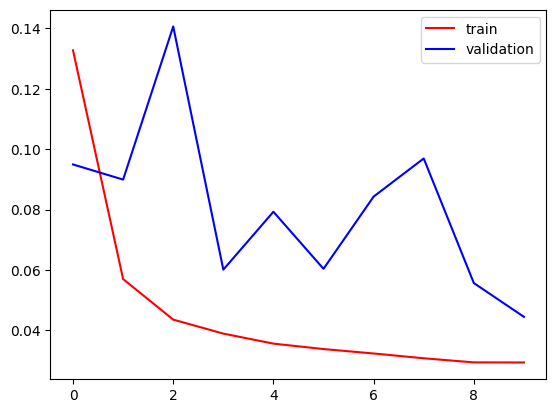

In [ ]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

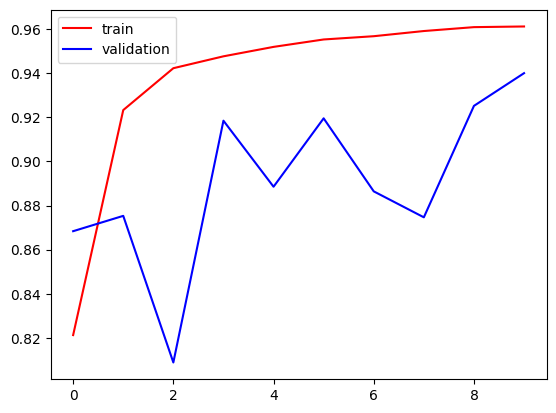

In [ ]:
plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

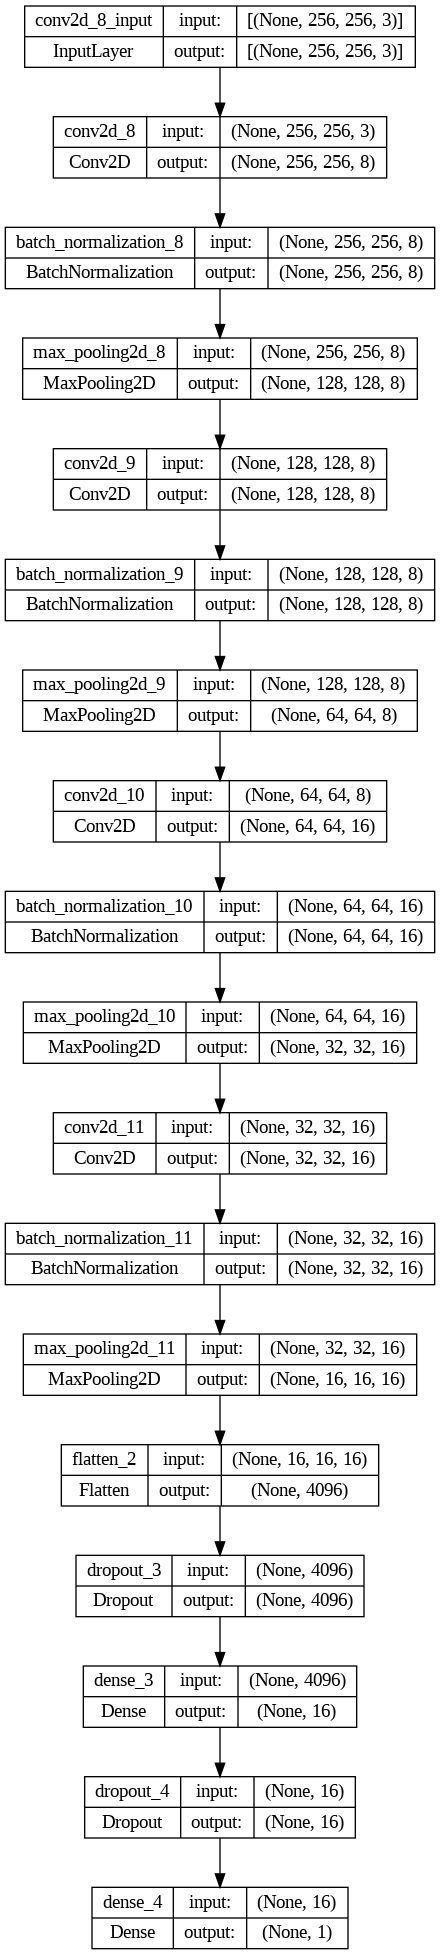

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 1,
    image_size = (256,256)
)

Found 10905 files belonging to 2 classes.


In [ ]:
model.evaluate(test_ds)

10905/10905 [==============================] - 38s 3ms/step - loss: 0.1000 - accuracy: 0.8678


[0.09999004006385803, 0.8677670955657959]